## Model development 
predicting the fair value of my car

In [3]:
##importing the required the libraries:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

In [4]:
## putting the values in the dataframe:
url = 'https://s3-api.us-geo.objectstorage.softlayer.net/cf-courses-data/CognitiveClass/DA0101EN/automobileEDA.csv'
df = pd.read_csv(url)
df.head()

,symboling,normalized-losses,make,aspiration,num-of-doors,body-style,drive-wheels,engine-location,wheel-base,length,...,compression-ratio,horsepower,peak-rpm,city-mpg,highway-mpg,price,city-L/100km,horsepower-binned,diesel,gas
0,3,122,alfa-romero,std,two,convertible,rwd,front,88.6,0.811148,...,9.0,111.0,5000.0,21,27,13495.0,11.190476,Medium,0,1
1,3,122,alfa-romero,std,two,convertible,rwd,front,88.6,0.811148,...,9.0,111.0,5000.0,21,27,16500.0,11.190476,Medium,0,1
2,1,122,alfa-romero,std,two,hatchback,rwd,front,94.5,0.822681,...,9.0,154.0,5000.0,19,26,16500.0,12.368421,Medium,0,1
3,2,164,audi,std,four,sedan,fwd,front,99.8,0.848630,...,10.0,102.0,5500.0,24,30,13950.0,9.791667,Medium,0,1
4,2,164,audi,std,four,sedan,4wd,front,99.4,0.848630,...,8.0,115.0,5500.0,18,22,17450.0,13.055556,Medium,0,1


## Linear regression plot:
#### 1.simple linear regression


In [5]:
## from the sklearn import lnear regression module:
from sklearn.linear_model import LinearRegression

## creating a linear regresion object:
lm = LinearRegression()

In [6]:
#1. using highway mpg to predict the value of price for my car:
X = df[['highway-mpg']]
Y = df[['price']]

In [7]:
##fitting the linear model:
lm.fit(X,Y)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None,
         normalize=False)

In [8]:
##getting the prediction for the given variable:
yhat = lm.predict(X)
yhat[0:5]

array([[16236.50464347],
       [16236.50464347],
       [17058.23802179],
       [13771.3045085 ],
       [20345.17153508]])

In [9]:
## value of intercept, value of the slope:
inter = lm.intercept_
coeff = lm.coef_
## the final linear model:
print("Yhat = {} +X {} ".format(inter,coeff))

Yhat = [38423.30585816] +X [[-821.73337832]] 


In [10]:
## using engine-size as the independent variable to predict the value of price:
lm1= LinearRegression()
x = df[['engine-size']]
lm1.fit(x,df[['price']])
Yhat = lm.predict(X)
Yhat[0:5]


array([[16236.50464347],
       [16236.50464347],
       [17058.23802179],
       [13771.3045085 ],
       [20345.17153508]])

In [11]:
## the final equation with the intercept and coef:
inter1 = lm1.intercept_
coeff1 = lm1.coef_
print ("Yhat = {} + X{}".format(inter1,coeff1))

Yhat = [-7963.33890628] + X[[166.86001569]]


### mutiple linear regression model:

In [12]:
##creating a new object:
lm2 = LinearRegression()
## using horsepower ,engine-size,curb-weight and highway-mpg as the predictor variables:
Z = df[['horsepower','engine-size','curb-weight','highway-mpg']]
## using the value to predict the value:
lm2.fit(Z,df[['price']])


LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None,
         normalize=False)

In [13]:
Yhatnew = lm2.predict(Z)
Yhatnew[0:5]

array([[13699.11161184],
       [13699.11161184],
       [19051.65470233],
       [10620.36193015],
       [15521.31420211]])

In [14]:
## to get the value of the of the coefficients:
intercept = lm2.intercept_
coefficients = lm2.coef_
## print the values:
print(intercept,coefficients)

[-15806.62462633] [[53.49574423 81.53026382  4.70770099 36.05748882]]


## Model evaluation using visualisation

In [15]:
##importing required libraries(seaborn,matplotlib inline):
import seaborn as sns
%matplotlib inline

#### 1. Regression plot
plots a regression line: scatter plot with a regresson line along with the correalation

(0, 48274.7003495795)

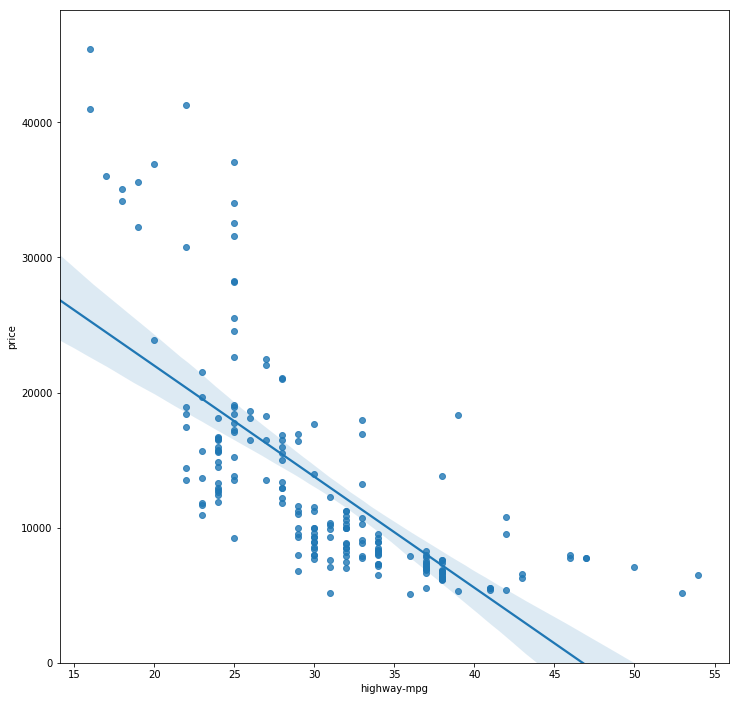

In [16]:
width = 12
height = 12
##figure size:
plt.figure(figsize =(width,height))
##finnal regplot:
sns.regplot(x="highway-mpg",y = "price", data=df)
plt.ylim(0)

(0, 47425.124162884524)

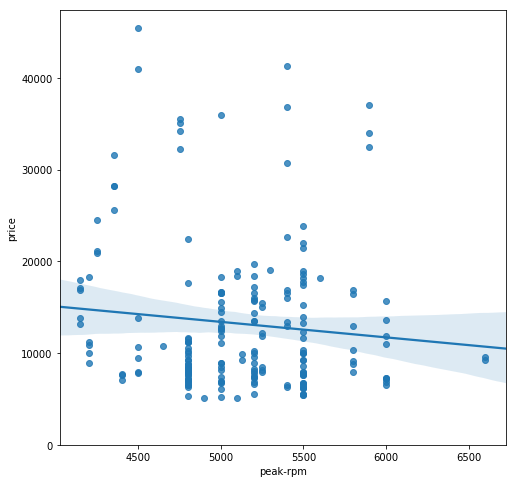

In [17]:
##plotting peak-rpm vs price :
width = 8
height = 8
##figsize
plt.figure(figsize =(width,height))
##regplot:
sns.regplot(x="peak-rpm", y="price", data= df)
plt.ylim(0)

#### 2. residual plot:
It is used to check the variance between the predicted values and the actual values of the predicted variable.

In [18]:
##the variance shows how the points are related to the independent variable, if the points are randomly scattered then a linear plot is good for the data
##if the points shows a curve or exhibits any kind of relation to the independent variable then the linear model isn't suitable for the given data
## residuals is the difference between the predicted value and actual value  of the variable 

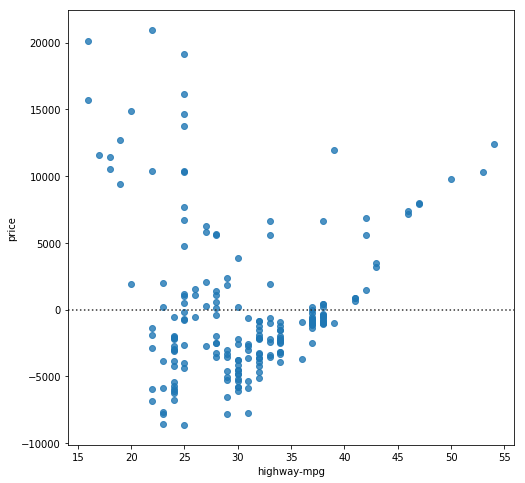

In [19]:
width = 8
height = 8
##figsize
plt.figure(figsize =(width,height))
##the residual is the dstance between the actualplotted value and the fitted regression line in the regression pot:
sns.residplot(x=df['highway-mpg'],y=df['price'])
plt.show()

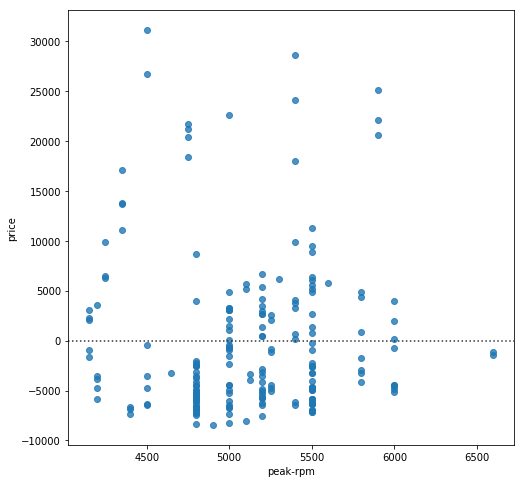

In [20]:
##residual plot of peak rpm vs price:
width = 8
height = 8
plt.figure(figsize=(width,height))
sns.residplot(x=df['peak-rpm'], y= df['price'])
plt.show()

#### visual representation of a multiple linear regression model:

In [21]:
##regplots and residual plots only help in visualising one v one plots
#we use distribution model to check out the distribution of price over various independent variables:
## THE PREDICTED VALUE:
Yhatnew[0:5]

array([[13699.11161184],
       [13699.11161184],
       [19051.65470233],
       [10620.36193015],
       [15521.31420211]])

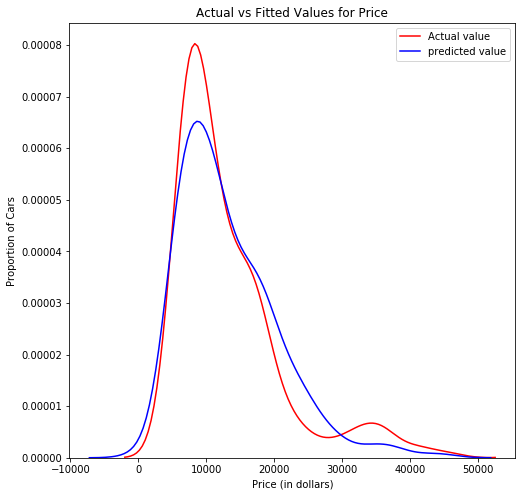

In [22]:
plt.figure(figsize=(width,height))

ax1 = sns.distplot(df['price'], hist=False, color="r", label = "Actual value")
sns.distplot(Yhatnew, hist=False, color="b", label = "predicted value")

plt.title('Actual vs Fitted Values for Price')
plt.xlabel('Price (in dollars)')
plt.ylabel('Proportion of Cars')

plt.show()
plt.close()

## Polynomial regressions and pipelines:
(higher order polynomial equations)

In [42]:
def PlotPolly(model, independent_variable, dependent_variabble, Name):
    x_new = np.linspace(15, 55,100)
    y_new = model(x_new)

    plt.plot(independent_variable, dependent_variabble, '.', x_new, y_new, '-')
    plt.title('Polynomial Fit with Matplotlib for Price ~ Length')
    ax = plt.gca()
    ax.set_facecolor((0.898, 0.898, 0.898))
    fig = plt.gcf()
    plt.xlabel(Name)
    plt.ylabel('Price of Cars')

    plt.show()
    plt.close()

In [43]:
x = df['highway-mpg']
y = df['price']

In [44]:
# Here we use a polynomial of the 3rd order (cubic) 
f = np.polyfit(x, y, 3)
p = np.poly1d(f)
print(p)

        3         2
-1.557 x + 204.8 x - 8965 x + 1.379e+05


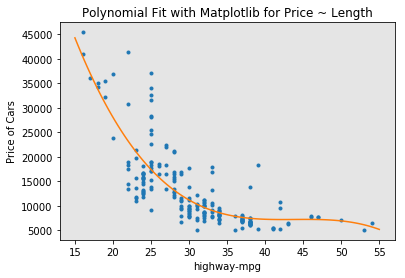

In [45]:
PlotPolly(p, x, y, 'highway-mpg')

In [60]:
x = df['highway-mpg']
y = df['price']
f = np.polyfit(x,y,3)
p = np.poly1d(f)
print(p)

        3         2
-1.557 x + 204.8 x - 8965 x + 1.379e+05


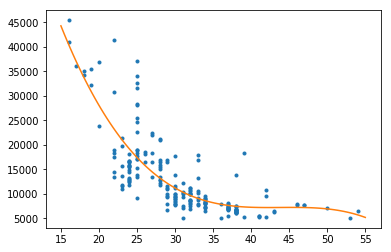

In [63]:
new = p(np.linspace(15, 55,100))
plt.plot(x,y,'.',np.linspace(15, 55,100),new,'-')

### multivariate polynomial:

In [65]:
## we need polynomial features to evaluate multivarite polynomials:
Z.head()

,horsepower,engine-size,curb-weight,highway-mpg
0,111.0,130,2548,27
1,111.0,130,2548,27
2,154.0,152,2823,26
3,102.0,109,2337,30
4,115.0,136,2824,22


In [66]:
from sklearn.preprocessing import PolynomialFeatures

In [67]:
## creating an obect with required degree of the polynomial:
pr = PolynomialFeatures(degree = 2)
pr

PolynomialFeatures(degree=2, include_bias=True, interaction_only=False)

In [71]:
## fitting the given data with (201samples,4 features) to (210samples and 15features):
z_fit = pr.fit_transform(Z)
z_fit.shape

(201, 15)

## Creating a pipeline to normalise,transform and create a regression plot in one go:

In [81]:
## importing all the nexessary modules
from sklearn.preprocessing import StandardScaler  ## to normalize hte data
from sklearn.preprocessing import PolynomialFeatures ## for multivariate analysis
from sklearn.linear_model import LinearRegression ## for linear regression of the give data

from sklearn.pipeline import Pipeline

In [82]:
## we need to create a list of tuples as in input with (first element= estimator(model), second element:model constructor):(objectname,objectcreator)
Input = [('scale',StandardScaler()),('polynomial', PolynomialFeatures(degree=2)),('model',LinearRegression())]

In [83]:
##Creating a pipeline constructor:
pipe = Pipeline(Input) ##pipeline object

In [85]:
##training the pipeline:
pipe.fit(Z,df['price'])

/opt/conda/envs/Python36/lib/python3.6/site-packages/sklearn/preprocessing/data.py:645: DataConversionWarning: Data with input dtype int64, float64 were all converted to float64 by StandardScaler.
  return self.partial_fit(X, y)
/opt/conda/envs/Python36/lib/python3.6/site-packages/sklearn/base.py:467: DataConversionWarning: Data with input dtype int64, float64 were all converted to float64 by StandardScaler.
  return self.fit(X, y, **fit_params).transform(X)


Pipeline(memory=None,
     steps=[('scale', StandardScaler(copy=True, with_mean=True, with_std=True)), ('polynomial', PolynomialFeatures(degree=2, include_bias=True, interaction_only=False)), ('model', LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None,
         normalize=False))])

In [88]:
## using the created ipleine to generate a prediction:
YHAT = pipe.predict(Z)
YHAT[0:4]

/opt/conda/envs/Python36/lib/python3.6/site-packages/sklearn/pipeline.py:331: DataConversionWarning: Data with input dtype int64, float64 were all converted to float64 by StandardScaler.
  Xt = transform.transform(Xt)


array([13102.74784201, 13102.74784201, 18225.54572197, 10390.29636555])

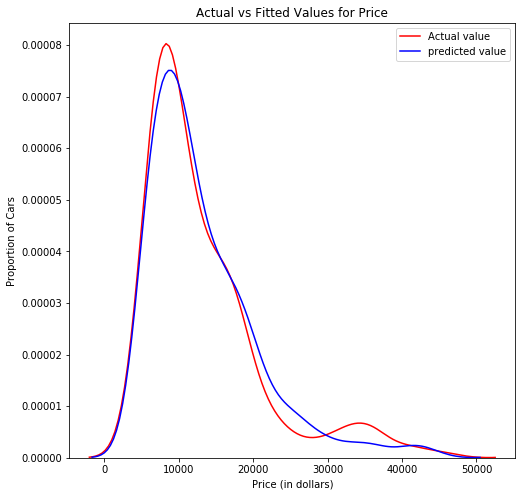

In [89]:
plt.figure(figsize=(width,height))

ax1 = sns.distplot(df['price'], hist=False, color="r", label = "Actual value")
sns.distplot(YHAT, hist=False, color="b", label = "predicted value")

plt.title('Actual vs Fitted Values for Price')
plt.xlabel('Price (in dollars)')
plt.ylabel('Proportion of Cars')

plt.show()
plt.close()

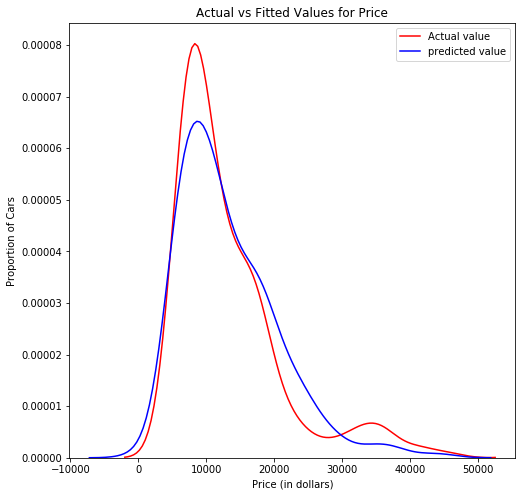

In [91]:
plt.figure(figsize=(width,height))

ax1 = sns.distplot(df['price'], hist=False, color="r", label = "Actual value")
sns.distplot(Yhatnew, hist=False, color="b", label = "predicted value")

plt.title('Actual vs Fitted Values for Price')
plt.xlabel('Price (in dollars)')
plt.ylabel('Proportion of Cars')

plt.show()
plt.close()

## Measures for in sample evaluation: 

The two methods to measure the accuracy of our data are
1. Mean Squared error - (gives us the mean of (yhat-y)^2) [lower the better]
2. R-squared value - gives us (1- MSE/MSE OF AVG OF THE DATA POINTS) [closer to 1 the better] --- coefficient of determination

In [94]:
## 1. getting the R squared of SL model:
lm.fit(X,Y)
lm.score(X,Y)


0.4965911884339175

In [99]:
## Getting the value of MSE:
from sklearn.metrics import mean_squared_error

## using the predicted values to calculate the MSE:
MSE = mean_squared_error(Yhat,Y)
MSE

31635042.944639895

In [100]:
## for polynomial fit:
from sklearn.metrics import r2_score
r_squared = r2_score(y, p(x))
print('The R-square value is: ', r_squared)

The R-square value is:  0.6741946663906513


In [101]:
mean_squared_error(df['price'], p(x))

20474146.42636125